## The Age of Recommender Systems
>The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

>They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

## There are basically three types of recommender systems:-

>Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

>Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

>Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.



## About DataSet:


The first dataset contains the following features:-

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:-

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy ,Thriller etc.

homepage - A link to the homepage of the movie.

id - This is infact the movie_id as in the first dataset.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation or adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved.



### Demographic Filtering -
Before getting started with this -

we need a metric to score or rate movie
Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-
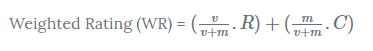
where,

v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as

### Content Based Filtering
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

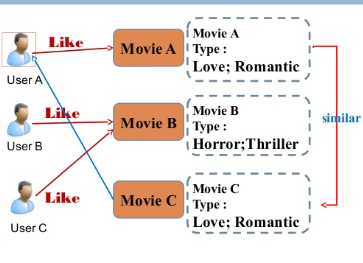

### 
With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.
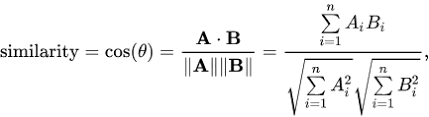
We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

### Collaborative Filtering
Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-

>User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

>Item Based Collaborative Filtering - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, sparsity is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

### Single Value Decomposition
One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.
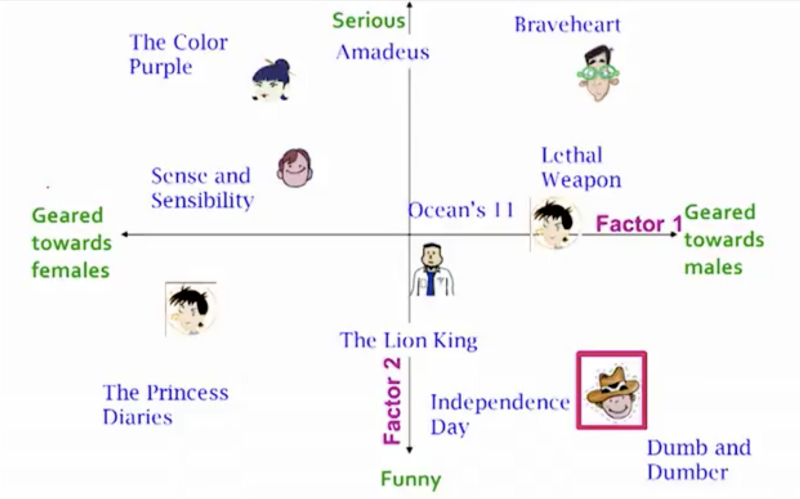


Now enough said , let's see how to implement this. Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.

# Import Necessary Libreries

In [1]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score
## Hyperopt modules
#from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
#from functools import partial
from sklearn.metrics import roc_auc_score
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
sns.set_palette("bright")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import plot_importance, to_graphviz
from xgboost import plot_tree
#For Model Acuracy
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import plot_importance, to_graphviz #
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import log_loss

import requests
import json
from IPython.display import Image, HTML, display

C:\Users\Siddhartha-PC\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Import Data

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
credits=pd.read_csv("./credits.csv")
keywords=pd.read_csv("./keywords.csv")
links=pd.read_csv("./links.csv")
links_small=pd.read_csv("./links_small.csv")
movies=pd.read_csv("./movies_metadata.csv")
ratings_small=pd.read_csv("./ratings_small.csv")

In [5]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
credits.shape

(45476, 3)

In [7]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
keywords.shape

(46419, 2)

In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
links.shape

(45843, 3)

In [11]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
movies.shape

(45466, 24)

In [13]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
ratings_small.shape

(100004, 4)

# Data Understanding

In [15]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [16]:
#In the movies dataset,the ID column contains[] so replacing with 0
movies['id'].replace('[]',0,inplace=True)

In [17]:
#Changing the datatype to numeric
movies['id'] = pd.to_numeric(movies['id'],errors='coerce')

In [18]:
#Merging movies and credits dataset with the common column 'id'
movies_credits = pd.merge(movies,credits,on='id')
print("Shape is:",movies_credits.shape)
movies_credits.head(2)

Shape is: (45538, 26)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [19]:
#Checking the null values of links dataset
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [20]:
#As on the links dataset 'tmdbId' is replaced with 'id' (because all the id's has been entered on 'tmdbId') 
links.rename(columns={'tmdbId':'id'},inplace=True)

In [21]:
#Dropping the null 'imdb_id' column
movies_credits = movies_credits.dropna(axis=0, subset=['imdb_id'])

In [22]:
#On 'imdb_id' we can see the values in 'tt' so lets remove it
movies_credits['imdb_id'] = movies_credits['imdb_id'].str.replace('tt''[0-7]','',regex=True)

In [23]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [24]:
#Changing the datatype
movies_credits['imdb_id'] = pd.to_numeric(movies_credits['imdb_id'])

In [25]:
#Rename the columns
links.rename(columns={'imdbId':'imdb_id'},inplace=True)

In [26]:
links.head()

,movieId,imdb_id,id
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [27]:
links1 = links[['movieId','imdb_id']]

In [28]:
#Merging movies_credits and links1 with the common 'imdb_id' columns
movies_credits = pd.merge(movies_credits,links1,on='imdb_id')

In [29]:
#Displaying first 2 rows
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2


In [30]:
movies_credits.shape

(30577, 27)

In [31]:
keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [32]:
#Merging movies_credits and keywords dataset based on 'id' column
movies_credits = pd.merge(movies_credits,keywords,on='id')

In [33]:
#Displaying first 2 rows
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [34]:
movies_credits.shape

(31087, 28)

In [35]:
movies_credits['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [36]:
import ast
# import module [ast]
# ast module have fuction [literal_eval] that converts the string in list
# Create function for [genres] and [keywords]

In [37]:
#As in Genre columns we found all the unwanted data so we scrapped the genre section which was under 'name' and created a list on it
def genre_name(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L



In [38]:
#Applying the function 'genre_name' on 'genres' column
movies_credits['genres'] = movies_credits['genres'].apply(genre_name)

In [39]:
movies_credits['genres'][0]

['Animation', 'Comedy', 'Family']

In [40]:
#Displaying first 2 rows
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [41]:
movies_credits['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [42]:
#All the cast name was under 'name' section so scrapped the data and stored on list
def cast_name(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 6:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [43]:
#Applying the function 'cast_name' on 'cast' column
movies_credits['cast'] = movies_credits['cast'].apply(cast_name)

In [44]:
movies_credits['cast'][0]

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger']

In [45]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [46]:
movies_credits['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [47]:
#Director name is scrapped from 'crew' column 
def director_name(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [48]:
#Applying the function 'director_name' on 'crew' column
movies_credits['crew'] = movies_credits['crew'].apply(director_name)

In [49]:
movies_credits['crew'][0]

['John Lasseter']

In [50]:
movies_credits['keywords'][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [51]:
#Applying the function 'genre_name' on 'keywords' column
movies_credits['keywords'] = movies_credits['keywords'].apply(genre_name)

In [52]:
movies_credits['keywords'][0]

['jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boy next door',
 'new toy',
 'toy comes to life']

In [53]:
#Displaying first 2 rows
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


### # 
#We can see that there are integer values present in the language column.
# #Let's take a look at it.
# #Dropping the specific rows mentioned below
# lang_drop = movies_credits[(movies_credits['original_language'] == '82.0') | (movies_credits['original_language'] == '68.0')| (movies_credits['original_language'] == '104.0')].index

# movies_credits.drop(index = lang_drop, inplace = True)

In [54]:
movies_credits['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [55]:
def btc_function(data):
    if type(data) == str:
        return ast.literal_eval(data)['name'].replace(" ","")
    return data
# https://www.kaggle.com/hadasik/movies-analysis-visualization-newbie


In [56]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'].replace(" ",""))
            return str(values)[1:-1]
        else:
            return None

In [57]:
movies_credits['belongs_to_collection']=movies_credits['belongs_to_collection'].apply(btc_function)

In [58]:
movies_credits['belongs_to_collection'][0]

'ToyStoryCollection'

In [59]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


In [60]:
movies_credits['production_companies'][2]

"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]"

In [61]:
movies_credits['production_companies']= movies_credits['production_companies'].apply(get_values)

In [62]:
movies_credits['production_companies'][2]

"'WarnerBros.', 'LancasterGate'"

In [63]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios',"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


In [64]:
movies_credits['production_countries'][150]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [65]:
movies_credits['production_countries']=movies_credits['production_countries'].apply(get_values)

In [66]:
movies_credits['production_countries'][150]

"'UnitedKingdom', 'UnitedStatesofAmerica'"

In [67]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


In [68]:
movies_credits['spoken_languages'][650]

"[{'iso_639_1': 'fr', 'name': 'Français'}]"

In [69]:
movies_credits['spoken_languages']=movies_credits['spoken_languages'].apply(get_values)

In [70]:
movies_credits['spoken_languages'][650]

"'Français'"

In [71]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,'English',Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"'English', 'Français'",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


In [72]:
movies_credits['original_language'][125]

'en'

In [73]:
# meta_data['btc_name'] = meta_data.belongs_to_collection.apply(btc_function)
# meta_data[['production_countries', 'spoken_languages' ,'keywords']] = meta_data[['genres', 'production_companies', 'production_countries', 'spoken_languages' ,'keywords' ,'cast' , 'crew']].applymap(get_values)
# meta_data['is_homepage'] = meta_data['homepage'].isnull()

In [74]:
movies_credits['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'pl',
       'ru', 'sv', 'ja', 'hi', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro',
       'hu', 'cy', 'vi', 'cs', 'da', 'no', 'sl', 'nb', 'el', 'sh', 'xx',
       'mk', 'bo', 'ca', 'fi', 'th', 'sk', 'bs', 'is', 'tr', 'ps', 'ab',
       'eo', 'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'hr', 'et', 'ku',
       'fy', 'ta', 'ur', 'id', 'lt', 'tl', 'kk', 'eu', 'ms', 'bg', nan,
       'qu', 'am', 'jv', 'lv', 'tg', 'ml', 'sq', 'ay', 'te', 'mr', 'uz',
       'ky', 'hy', 'lb', 'si'], dtype=object)

In [75]:
#Checking the null values
movies_credits['original_language'].isnull().sum()

9

In [76]:
movies_credits.dropna(subset = ['original_language'], inplace = True)# dropping the nan values

In [77]:
lang_dec = {'en' : 'English', 'fr' : 'French', 'zh' : 'Chinese', 'it' : 'Italian', 'fa' : 'Farsi',
                   'nl' : 'Dutch', 'de' : 'German', 'cn' : 'Chinese','ar' : 'Arabic', 'es' : 'Spanish', 
                   'ru' : 'Russian', 'sv' : 'Swedish', 'ja' : 'Japanese', 'ko' : 'Korean', 'sr' : 'Serbian', 
                   'bn' : 'Bengali', 'he' : 'Hebrew', 'pt' : 'Portuguese', 'wo' : 'Wolof', 'ro' : 'Romanian', 
                   'hu' : 'Hungarian', 'cy' : 'Welsh', 'vi' : 'Vietnamese', 'cs' : 'Czech', 'da' : 'Danish',
                   'no' : 'Norwegian', 'nb' : 'Norwegian', 'pl' : 'Polish', 'el' : 'Greek', 'sh' : 'Serbo-Croatian',
                   'mk' : 'Macedonian', 'bo' : 'Tibetan', 'ca' : 'Catalan', 'fi' : 'Finnish', 'th' : 'Thai',
                   'sk' : 'Slovak', 'bs' : 'Bosnian', 'hi' : 'Hindi', 'tr' : 'Turkish', 'is' : 'Icelandic', 
                   'ps' : 'Pashto', 'ab' : 'Abkhazian','eo' : 'Esperanto','ka' : 'Georgian', 'mn' : 'Mongolian',
                   'bm' : 'Bambara', 'zu' : 'Zulu', 'uk' : 'Ukrainian', 'af' : 'Afrikaans', 'la' : 'Latin',
                   'et' : 'Estonian', 'ku' : 'Kurdish', 'fy' : 'Frisian', 'lv' : 'Latvian', 'ta' : 'Tamil',
                   'sl' : 'Slovenian', 'tl' : 'Tagalog', 'ur' : 'Urdu', 'rw' : 'Kinyarwanda', 'id' : 'Indonesian', 
                   'bg' : 'Bulgarian', 'mr' : 'Marathi', 'lt' : 'Lithuanian', 'kk' : 'Kazakh', 'ms' : 'Malay',
                   'sq' : 'Albanian', 'qu' : 'Quechua', 'te' : 'Telugu', 'am' : 'Amharic', 'jv' : 'Javanese',
                   'tg' : 'Tajik', 'ml' : 'Malayalam','hr' : 'Croatian', 'lo' : 'Laothian', 'ay' : 'Aymara',
                   'kn' : 'Kannada', 'eu' : 'Basque', 'ne' : 'Nepali', 'pa' : 'Punjabi', 'ky' : 'Kirghiz', 
                   'gl' : 'Galician', 'uz' : 'Uzbek', 'sm' : 'Samoan', 'mt' : 'Maltese', 'hy' : 'Armenian',
                   'iu' : 'Inuktitut', 'lb' : 'Luxembourgish', 'si' : 'Sinhalese'

}


movies_credits['original_language'] = movies_credits['original_language'].map(lang_dec)

In [78]:
movies_credits['original_language'].unique()

array(['English', 'French', 'Chinese', 'Italian', 'Farsi', 'Dutch',
       'German', 'Arabic', 'Spanish', 'Polish', 'Russian', 'Swedish',
       'Japanese', 'Hindi', 'Korean', 'Serbian', 'Bengali', 'Hebrew',
       'Portuguese', 'Wolof', 'Romanian', 'Hungarian', 'Welsh',
       'Vietnamese', 'Czech', 'Danish', 'Norwegian', 'Slovenian', 'Greek',
       'Serbo-Croatian', nan, 'Macedonian', 'Tibetan', 'Catalan',
       'Finnish', 'Thai', 'Slovak', 'Bosnian', 'Icelandic', 'Turkish',
       'Pashto', 'Abkhazian', 'Esperanto', 'Georgian', 'Mongolian',
       'Bambara', 'Zulu', 'Ukrainian', 'Afrikaans', 'Latin', 'Croatian',
       'Estonian', 'Kurdish', 'Frisian', 'Tamil', 'Urdu', 'Indonesian',
       'Lithuanian', 'Tagalog', 'Kazakh', 'Basque', 'Malay', 'Bulgarian',
       'Quechua', 'Amharic', 'Javanese', 'Latvian', 'Tajik', 'Malayalam',
       'Albanian', 'Aymara', 'Telugu', 'Marathi', 'Uzbek', 'Kirghiz',
       'Armenian', 'Luxembourgish', 'Sinhalese'], dtype=object)

In [79]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,'English',Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,English,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"'English', 'Français'",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'..."


In [80]:
movies_credits["tagline"][6]

'You are cordially invited to the most surprising merger of the year.'

In [81]:
movies_credits["overview"][2]

"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max."

In [82]:
movies_credits["poster_path"][2]

'/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg'

In [83]:
def null_values(df):
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            print('Total values missing in {} are {}'.format(col , df[col].isnull().sum()))
null_values(movies_credits)

Total values missing in belongs_to_collection are 27777
Total values missing in homepage are 28508
Total values missing in original_language are 26
Total values missing in overview are 604
Total values missing in popularity are 1
Total values missing in poster_path are 245
Total values missing in production_companies are 1
Total values missing in production_countries are 1
Total values missing in release_date are 33
Total values missing in revenue are 1
Total values missing in runtime are 150
Total values missing in spoken_languages are 1
Total values missing in status are 56
Total values missing in tagline are 16365
Total values missing in title are 1
Total values missing in video are 1
Total values missing in vote_average are 1
Total values missing in vote_count are 1


In [84]:
movies_credits.shape

(31078, 28)

In [85]:
#Dropping the null values from 'release_date' column
movies_credits.dropna(subset = ['release_date'], inplace = True)

In [86]:
#Applying 'release_date' into datetime format  
movies_credits['release_date'] = movies_credits['release_date'].apply(pd.to_datetime)

In [87]:
#Fetching the year from 'release_year' columns
movies_credits['release_year']  = movies_credits['release_date'].apply(lambda x:x.year)

In [88]:
#Displaying the 'release_year' column
movies_credits['release_year']


0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
31082    2000
31083    1995
31084    1991
31085    2003
31086    1917
Name: release_year, Length: 31045, dtype: int64

In [89]:
#Fetching the data,in which the runtime is less than 15
movies_credits[movies_credits['runtime'] <= 15].shape

(1469, 29)

In [90]:
median_runtime = movies_credits['runtime'].median() # getting the median value of runtime
movies_credits['runtime'] = movies_credits['runtime'].replace(list(range(0, 16)), median_runtime)
#replacing runtime less than 10 with median value

In [91]:
movies_credits['runtime'].isnull().sum()#Checking the null values runtime column

143

In [92]:
movies_credits.dropna(subset = ['runtime'], inplace = True)
#Dropping the rows which contains nan values in 'runtime' column

In [93]:
movies_credits.isnull().sum()#Checking the null values from movies_credits dataset

adult                        0
belongs_to_collection    27606
budget                       0
genres                       0
homepage                 28333
id                           0
imdb_id                      0
original_language           26
original_title               0
overview                   454
popularity                   0
poster_path                204
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
spoken_languages             0
status                      50
tagline                  16193
title                        0
video                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
movieId                      0
keywords                     0
release_year                 0
dtype: int64

In [94]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords,release_year
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,'English',Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva...",1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,English,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"'English', 'Français'",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'...",1995


In [95]:
from statistics import mode

In [96]:
#Filling nan with mode values 
movies_credits['status'].fillna(movies_credits['status'].mode()[0],inplace=True)

In [97]:
#Displaying 
movies_credits['status']

0        Released
1        Released
2        Released
3        Released
4        Released
           ...   
31082    Released
31083    Released
31084    Released
31085    Released
31086    Released
Name: status, Length: 30902, dtype: object

In [98]:
#Filling nan values with mode values 
movies_credits['original_language'].fillna(movies_credits['original_language'].mode()[0],inplace=True)

In [99]:
#Dispalying
movies_credits['original_language']

0        English
1        English
2        English
3        English
4        English
          ...   
31082    English
31083    English
31084    English
31085    English
31086    English
Name: original_language, Length: 30902, dtype: object

In [100]:
#Reading the dataset
ratings = pd.read_csv("./ratings_small.csv")

In [101]:
#Dropping the timestamp
ratings.drop('timestamp',axis=1,inplace=True)

In [102]:
#Displaying
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [103]:
ratings = ratings[['movieId','rating']]

In [104]:
#Applying the groupby operation on 'movieId'
ratings1 = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())

In [105]:
#Displaying
movies1 = pd.DataFrame(movies_credits[['title','movieId','release_year']])

In [106]:
#Merging the dataset 'movies1' and 'ratins1' with common column 'movieId'
ratings2 = pd.merge(movies1,ratings1,on='movieId')

In [107]:
#Displaying
ratings2.head(5)

,title,movieId,release_year,rating
0,Toy Story,1,1995,3.872470
1,Jumanji,2,1995,3.401869
2,Grumpier Old Men,3,1995,3.161017
3,Waiting to Exhale,4,1995,2.384615
4,Father of the Bride Part II,5,1995,3.267857


In [108]:
#Changing the datatype
movies_credits['popularity'] = pd.to_numeric(movies_credits['popularity'])

In [109]:
#Changing the datatype
movies_credits['budget'] = pd.to_numeric(movies_credits['budget'])

In [110]:
#Changing the datatype
movies_credits['overview'] = movies_credits['overview'].astype(str)

In [111]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x:x.lower() and x.split()) 

In [112]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords,release_year
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,'English',Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1,"[jealousy, toy, boy, friendship, friends, riva...",1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,English,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"'English', 'Français'",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],2,"[board game, disappearance, based on children'...",1995


In [113]:
# Transform list of tags in the string and in lowercase
# df_new_final['tags'] = df_new_final['tags'].apply(lambda x: " ".join(x).lower())
# df_new_final['tags'] = df_new_final['tags'].str.lower()
# df_new_final.head()

In [114]:
#Replacement
movies_credits['genres'] = movies_credits['genres'].apply(lambda x:[i.replace(' ','') for i in x])
movies_credits['keywords'] = movies_credits['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
movies_credits['cast'] = movies_credits['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movies_credits['crew'] = movies_credits['crew'].apply(lambda x:[i.replace(' ','') for i in x])

In [115]:
movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords,release_year
0,False,ToyStoryCollection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'PixarAnimationStudios','UnitedStatesofAmerica',1995-10-30,373554033.0,81.0,'English',Released,NaN,Toy Story,False,7.7,5415.0,"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],1,"[jealousy, toy, boy, friendship, friends, riva...",1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,113497,English,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"'TriStarPictures', 'TeitlerFilm', 'InterscopeC...",'UnitedStatesofAmerica',1995-12-15,262797249.0,104.0,"'English', 'Français'",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],2,"[boardgame, disappearance, basedonchildren'sbo...",1995


In [116]:
#Changing the datatype
movies_credits['overview'] = movies_credits['overview'].astype(str)

In [117]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x:x.split()) 


In [119]:
#Creating a feature column in which it carries multiple column('overview','genre','keywords','production_companies','production_countries','cast','crew')
movies_credits['features'] = movies_credits['overview']+movies_credits['genres']+movies_credits['keywords']+movies_credits['cast']+movies_credits['crew']
                                

In [120]:
#Dropping the 'spoken_language' column
movies_credits.drop(columns='spoken_languages',axis=1,inplace=True)

In [121]:
#Replacement and joining opeartion
movies_credits['features'].apply(lambda x:[i.replace(',','') for i in x ])


0        [['Led', 'by', 'Woody', "Andy's", 'toys', 'liv...
1        [['When', 'siblings', 'Judy', 'and', 'Peter', ...
2        [['A', 'family', 'wedding', 'reignites', 'the'...
3        [['Cheated', 'on', 'mistreated', 'and', 'stepp...
4        [['Just', 'when', 'George', 'Banks', 'has', 'r...
                               ...                        
31082    [['A', 'film', 'archivist', 'revisits', 'the',...
31083    [["It's", 'the', 'year', '3000', 'AD.', 'The',...
31084    [['Yet', 'another', 'version', 'of', 'the', 'c...
31085    [['When', 'one', 'of', 'her', 'hits', 'goes', ...
31086    [['In', 'a', 'small', 'town', 'live', 'two', '...
Name: features, Length: 30902, dtype: object

In [122]:
movies_credits['features'] = movies_credits['features'].apply(lambda x:' '.join(x))


In [123]:
movies_credits['keywords'].apply(lambda x:' '.join(x))

0        jealousy toy boy friendship friends rivalry bo...
1        boardgame disappearance basedonchildren'sbook ...
2           fishing bestfriend duringcreditsstinger oldmen
3        basedonnovel interracialrelationship singlemot...
4        baby midlifecrisis confidence aging daughter m...
                               ...                        
31082     witch mythology legend serialkiller mockumentary
31083                                                     
31084                                                     
31085                                                     
31086                                                     
Name: keywords, Length: 30902, dtype: object

In [124]:
movies_credits['cast'] = movies_credits['cast'].apply(lambda x:' '.join(x))
movies_credits['crew'] = movies_credits['crew'].apply(lambda x:' '.join(x))
movies_credits['genres'] = movies_credits['genres'].apply(lambda x:' '.join(x))
movies_credits['overview'] = movies_credits['overview'].apply(lambda x:' '.join(x))
movies_credits['production_companies'] = movies_credits['production_companies'].apply(lambda x:' '.join(x))
movies_credits['production_countries'] = movies_credits['production_countries'].apply(lambda x:' '.join(x))
movies_credits['keywords'] = movies_credits['keywords'].apply(lambda x:' '.join(x))

In [125]:
movies_credits.head(2)



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords,release_year,features
0,False,ToyStoryCollection,30000000,Animation Comedy Family,http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"['Led', 'by', 'Woody,', ""Andy's"", 'toys', 'liv...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,' P i x a r A n i m a t i o n S t u d i o s ',' U n i t e d S t a t e s o f A m e r i c a ',1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,False,7.7,5415.0,TomHanks TimAllen DonRickles JimVarney Wallace...,JohnLasseter,1,jealousy toy boy friendship friends rivalry bo...,1995,"['Led', 'by', 'Woody,', ""Andy's"", 'toys', 'liv..."
1,False,NaN,65000000,Adventure Fantasy Family,NaN,8844.0,113497,English,Jumanji,"['When', 'siblings', 'Judy', 'and', 'Peter', '...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"' T r i S t a r P i c t u r e s ' , ' T e i ...",' U n i t e d S t a t e s o f A m e r i c a ',1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,RobinWilliams JonathanHyde KirstenDunst Bradle...,JoeJohnston,2,boardgame disappearance basedonchildren'sbook ...,1995,"['When', 'siblings', 'Judy', 'and', 'Peter', '..."


In [126]:
movies_credits['features'] = movies_credits['features'].apply(lambda x:x.lower())


In [127]:
#Saving the dataset in csv format
movies_credits.to_csv("./movies_credits.csv")
ratings2.to_csv("./ratings2.csv")

In [133]:
movies_credits['poster_path']=movies_credits['poster_path'].dropna()

In [135]:
#Verifying Missing Values
movies_credits['tagline'] = movies_credits['tagline'].fillna('unknown')

In [136]:
movies_credits.isnull().sum()

adult                        0
belongs_to_collection    27606
budget                       0
genres                       0
homepage                 28333
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                     0
popularity                   0
poster_path                204
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
status                       0
tagline                      0
title                        0
video                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
movieId                      0
keywords                     0
release_year                 0
features                     0
dtype: int64

In [139]:
movies_credits['belongs_to_collection']=movies_credits['belongs_to_collection'].fillna('unknown')

In [140]:
movies_credits['homepage']=movies_credits['homepage'].fillna('unknown')

In [141]:
movies_credits.isnull().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path              204
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
status                     0
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
movieId                    0
keywords                   0
release_year               0
features                   0
dtype: int64

In [142]:
movies_credits['poster_path']=movies_credits['poster_path'].dropna()

In [143]:
movies_credits.isnull().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path              204
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
status                     0
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
movieId                    0
keywords                   0
release_year               0
features                   0
dtype: int64

'/qYKL8PCgQhZaGbyNJ7nWH0Tloy4.jpg'

In [152]:
movies_credits['poster_path'].isna().sum()

204

In [153]:
movies_credits['poster_path'].dropna(inplace=True)

In [154]:
movies_credits['poster_path'].isna().sum()

204

In [155]:
movies_credits['poster_path']=movies_credits['poster_path'].fillna('unknown')

In [156]:
movies_credits['poster_path'].isna().sum()

0

In [157]:
movies_credits.isnull().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
cast                     0
crew                     0
movieId                  0
keywords                 0
release_year             0
features                 0
dtype: int64

In [164]:
movies_credits=movies_credits[movies_credits['poster_path']!='unknown']
movies_credits.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count,cast,crew,movieId,keywords,release_year,features
0,False,ToyStoryCollection,30000000,Animation Comedy Family,http://toystory.disney.com/toy-story,862.0,114709,English,Toy Story,"['Led', 'by', 'Woody,', ""Andy's"", 'toys', 'liv...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,' P i x a r A n i m a t i o n S t u d i o s ',' U n i t e d S t a t e s o f A m e r i c a ',1995-10-30,373554033.0,81.0,Released,unknown,Toy Story,False,7.7,5415.0,TomHanks TimAllen DonRickles JimVarney Wallace...,JohnLasseter,1,jealousy toy boy friendship friends rivalry bo...,1995,"['led', 'by', 'woody,', ""andy's"", 'toys', 'liv..."
1,False,unknown,65000000,Adventure Fantasy Family,unknown,8844.0,113497,English,Jumanji,"['When', 'siblings', 'Judy', 'and', 'Peter', '...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"' T r i S t a r P i c t u r e s ' , ' T e i ...",' U n i t e d S t a t e s o f A m e r i c a ',1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,RobinWilliams JonathanHyde KirstenDunst Bradle...,JoeJohnston,2,boardgame disappearance basedonchildren'sbook ...,1995,"['when', 'siblings', 'judy', 'and', 'peter', '..."
2,False,GrumpyOldMenCollection,0,Romance Comedy,unknown,15602.0,113228,English,Grumpier Old Men,"['A', 'family', 'wedding', 'reignites', 'the',...",11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"' W a r n e r B r o s . ' , ' L a n c a s t ...",' U n i t e d S t a t e s o f A m e r i c a ',1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,WalterMatthau JackLemmon Ann-Margret SophiaLor...,HowardDeutch,3,fishing bestfriend duringcreditsstinger oldmen,1995,"['a', 'family', 'wedding', 'reignites', 'the',..."
3,False,unknown,16000000,Comedy Drama Romance,unknown,31357.0,114885,English,Waiting to Exhale,"['Cheated', 'on,', 'mistreated', 'and', 'stepp...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,' T w e n t i e t h C e n t u r y F o x F i l ...,' U n i t e d S t a t e s o f A m e r i c a ',1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,WhitneyHouston AngelaBassett LorettaDevine Lel...,ForestWhitaker,4,basedonnovel interracialrelationship singlemot...,1995,"['cheated', 'on,', 'mistreated', 'and', 'stepp..."
4,False,FatheroftheBrideCollection,0,Comedy,unknown,11862.0,113041,English,Father of the Bride Part II,"['Just', 'when', 'George', 'Banks', 'has', 're...",8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"' S a n d o l l a r P r o d u c t i o n s ' , ...",' U n i t e d S t a t e s o f A m e r i c a ',1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,SteveMartin DianeKeaton MartinShort KimberlyWi...,CharlesShyer,5,baby midlifecrisis confidence aging daughter m...,1995,"['just', 'when', 'george', 'banks', 'has', 're..."


In [165]:
movies_credits.dtypes

adult                            object
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                              float64
imdb_id                           int64
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
cast                             object
crew                             object


In [166]:
movies_credits.to_csv("./movies.csv",index=False)